In [1]:
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["image.cmap"] = "gray"

from tensorflow.keras.datasets import fashion_mnist

In [2]:
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(X_train_all, y_train_all), (X_test, y_test) = mnist.load_data()

X_valid = X_train_all[:10000]
X_train = X_train_all[10000:]

y_valid = y_train_all[:10000]
y_train = y_train_all[10000:]

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


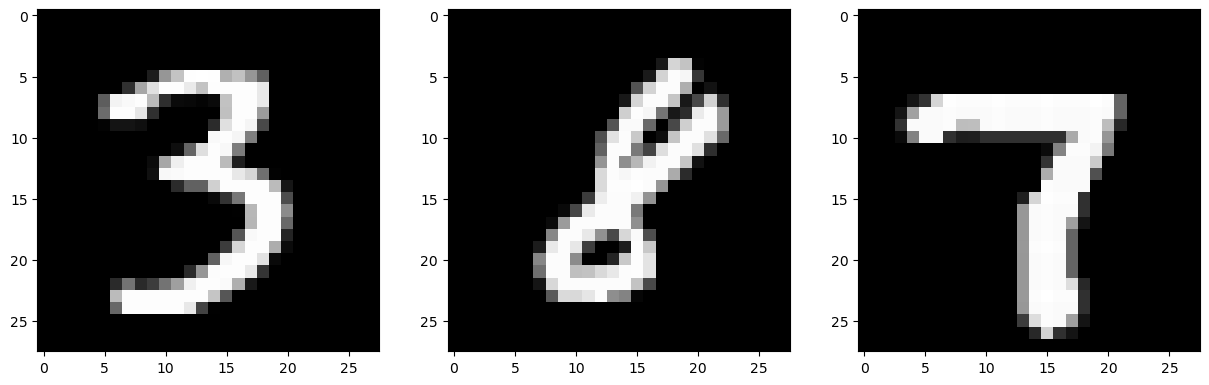

In [4]:
plt.figure(figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.axis(True)
    plt.imshow(X_train[i], cmap="gray")
    plt.subplots_adjust(wspace=0.2, hspace=0.2)

In [5]:
X_train = X_train.reshape((X_train.shape[0],28*28))
X_train = X_train.astype('float')/255

X_test = X_test.reshape((X_test.shape[0],28*28))
X_test = X_test.astype('float')/255

X_valid = X_valid.reshape((X_valid.shape[0],28*28))
X_valid = X_valid.astype("float")/255

In [6]:
y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)
y_test  = to_categorical(y_test)

In [7]:
model = tf.keras.models.Sequential()

model.add(Dense(128,activation=("relu"),input_shape=(X_train.shape[1],)))
model.add(Dense(128,activation=("relu")))
model.add(Dense(10,activation=("softmax")))

model.summary()

E:\anaconda3.14\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=["accuracy"])

In [9]:
training_result = model.fit(X_train,y_train,batch_size=64,epochs=21,validation_data=[X_valid,y_valid])

Epoch 1/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8643 - loss: 0.4779 - val_accuracy: 0.9459 - val_loss: 0.1736
Epoch 2/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9600 - loss: 0.1358 - val_accuracy: 0.9612 - val_loss: 0.1286
Epoch 3/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9742 - loss: 0.0889 - val_accuracy: 0.9668 - val_loss: 0.1108
Epoch 4/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9817 - loss: 0.0646 - val_accuracy: 0.9680 - val_loss: 0.1121
Epoch 5/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9870 - loss: 0.0483 - val_accuracy: 0.9690 - val_loss: 0.1205
Epoch 6/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9904 - loss: 0.0372 - val_accuracy: 0.9709 - val_loss: 0.1157
Epoch 7/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9924 - loss: 0.0289 - val_accuracy: 0.9722 - val_loss: 0.1215
Epoch 8/21
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9935 - loss: 0.0248 - val_accuracy: 0.

In [10]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, 20])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show()
    plt.close()

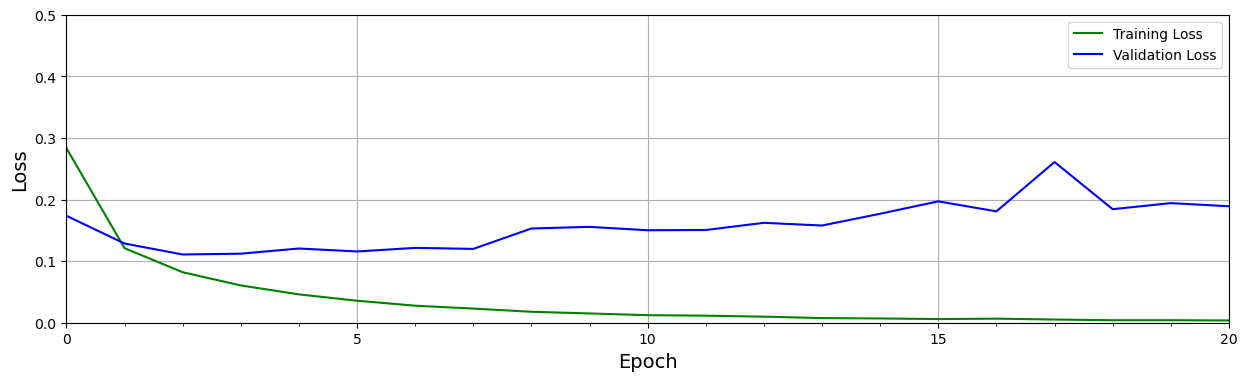

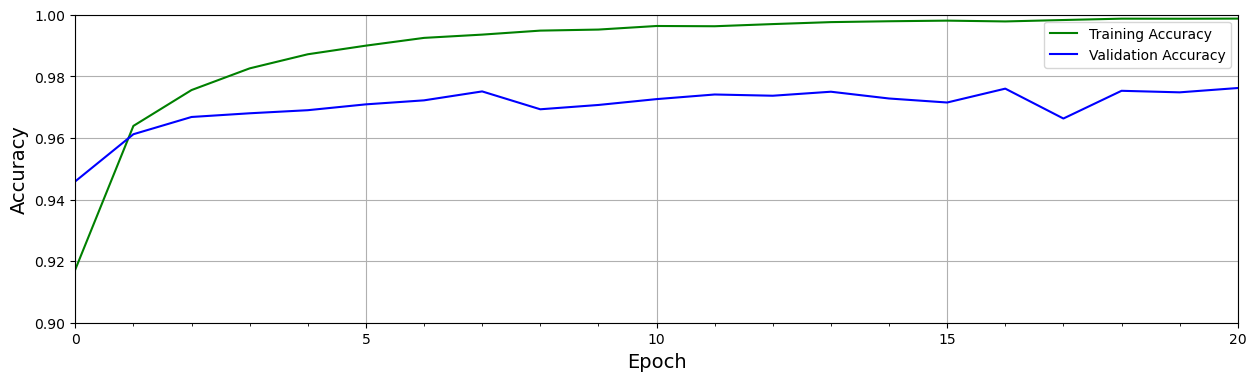

In [11]:
# Retrieve training results.
train_loss = training_result.history["loss"]
train_acc  = training_result.history["accuracy"]
valid_loss = training_result.history["val_loss"]
valid_acc  = training_result.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 0.5],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.9, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

In [30]:
predictions = model.predict(X_test)
index = 0
print("Ground truth for test digits: ",y_test[index])
print("\n")
print('Predictions for each class:\n')

for i in range(10):
    print("Digit: ",i, "probability: ",predictions[index][i])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step
Ground truth for test digits:  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


Predictions for each class:

Digit:  0 probability:  3.5929135e-26
Digit:  1 probability:  2.4750297e-18
Digit:  2 probability:  3.7657184e-16
Digit:  3 probability:  5.311548e-16
Digit:  4 probability:  5.690604e-28
Digit:  5 probability:  1.7555748e-25
Digit:  6 probability:  2.541903e-34
Digit:  7 probability:  1.0
Digit:  8 probability:  1.03137e-22
Digit:  9 probability:  5.4948387e-20


In [34]:
predictions = model.predict(X_test)

predictions_labels = [np.argmax(i) for i in predictions]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step


<function matplotlib.pyplot.show(close=None, block=None)>

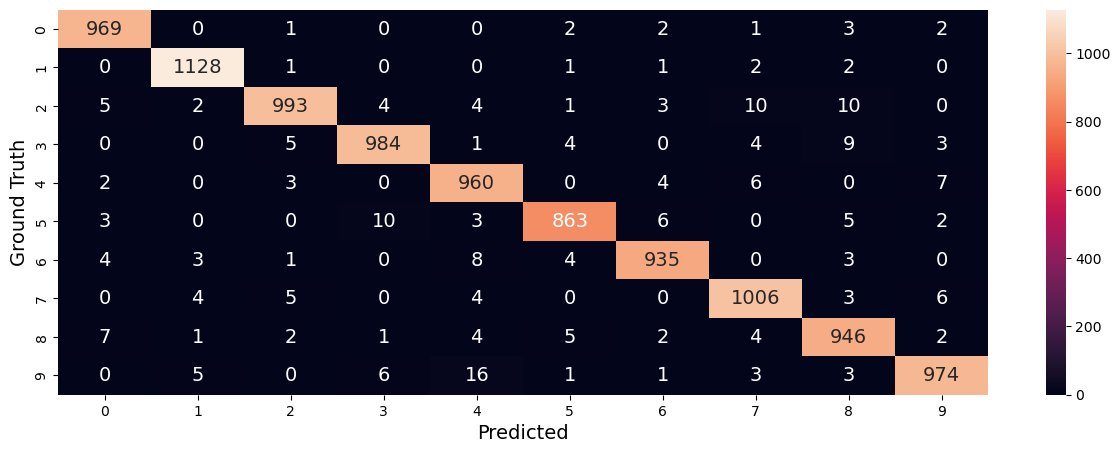

In [64]:
y_test_label = tf.argmax(y_test,axis=1)

cm = tf.math.confusion_matrix(labels= y_test_label, predictions = predictions_labels )

plt.figure(figsize=(15,5))
import seaborn as sn
sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 14})
plt.xlabel("Predicted")
plt.ylabel("Ground Truth")
plt.show